In [1]:
def make_vocabulary(trd):
    vocabulary = set()
    for i in trd.flatten():
        tweet_words = i.split()
        for j in tweet_words:
            vocabulary.add(j)
    return vocabulary

In [2]:
def make_bow(trd, vocabulary):
    bow = np.zeros((len(trd), len(vocabulary)))
    for i in range (len(trd)):
        tweet_words = trd.flatten()[i].split()
        frequency = collections.Counter(tweet_words)
        for j in range(len(vocabulary)):
            if vocabulary[j] in tweet_words:
                bow[i][j] = frequency[vocabulary[j]]
            else:
                bow[i][j] = 0
    return bow

In [3]:
def KNN(test_point, trd, dist_t, labels, k):
    distances = np.zeros((len(trd), 2))
    for i in range(len(trd)):
        if(dist_t == "euclidean"):
            distances[i, 0] = np.sum(np.absolute(test_point - trd[i]))
            distances[i, 1] = labels[i, -1]

        elif(dist_t == "manhatten"):
            distances[i, 0] = np.sqrt(np.sum(np.square(test_point - trd[i])))
            distances[i, 1] = labels[i, -1]
    sorted_distances = distances[distances[:, 0].argsort()]
    while(1):
        class_frequency = {-1:0, 0:0, 1:0}
        k_1 = sorted_distances[:k, 1]
        occurences = collections.Counter(k_1)
        for key in occurences.keys():
            class_frequency[key] = occurences[key]
        if(class_frequency[-1] == class_frequency[0] == class_frequency[1]):
            k = k - 1
        elif(class_frequency[-1] == class_frequency[0] != class_frequency[1] and class_frequency[1] < class_frequency[-1]):
            k = k - 1
        elif(class_frequency[-1] == class_frequency[1] != class_frequency[0] and class_frequency[0] < class_frequency[-1]):
            k = k - 1
        elif(class_frequency[0] == class_frequency[1] != class_frequency[-1] and class_frequency[-1] < class_frequency[0]):
            k = k - 1
        else:
            label = max(class_frequency, key=class_frequency.get)
            return label

In [4]:
def get_confusion_matrix(predicted_labels, gold_labels):
    confusion_matrix = np.zeros((3, 3))
    for i in range(len(predicted_labels)):
        if(predicted_labels[i] == 1):
            if(gold_labels[i] == 1):
                confusion_matrix[0, 0] = confusion_matrix[0, 0] + 1
            elif(gold_labels[i] == 0):
                confusion_matrix[0, 1] = confusion_matrix[0, 1] + 1
            elif(gold_labels[i] == -1):
                confusion_matrix[0, 2] = confusion_matrix[0, 2] + 1
        elif(predicted_labels[i] == 0):
            if(gold_labels[i] == 1):
                confusion_matrix[1, 0] = confusion_matrix[1, 0] + 1
            elif(gold_labels[i] == 0):
                confusion_matrix[1, 1] = confusion_matrix[1, 1] + 1
            elif(gold_labels[i] == -1):
                confusion_matrix[1, 2] = confusion_matrix[1, 2] + 1
        elif(predicted_labels[i] == -1):
            if(gold_labels[i] == 1):
                confusion_matrix[2, 0] = confusion_matrix[2, 0] + 1
            elif(gold_labels[i] == 0):
                confusion_matrix[2, 1] = confusion_matrix[2, 1] + 1
            elif(gold_labels[i] == -1):
                confusion_matrix[2, 2] = confusion_matrix[2, 2] + 1
    return(confusion_matrix)

In [5]:
def evaluation(confusion_matrix):
    confusion_a_matrix = np.zeros((2,2))
    confusion_a_matrix[0][0] = confusion_matrix[0][0]
    confusion_a_matrix[0][1] = confusion_matrix[0][1] + confusion_matrix[0][2]
    confusion_a_matrix[1][0] = confusion_matrix[1][0] + confusion_matrix[2][0]
    confusion_a_matrix[1][1] = confusion_matrix[1][1] + confusion_matrix[1][2] + confusion_matrix[2][1] + confusion_matrix[2][2]

    confusion_b_matrix = np.zeros((2,2))
    confusion_b_matrix[0][0] = confusion_matrix[1][1]
    confusion_b_matrix[0][1] = confusion_matrix[1][0] + confusion_matrix[1][2]
    confusion_b_matrix[1][0] = confusion_matrix[0][1] + confusion_matrix[2][1]
    confusion_b_matrix[1][1] = confusion_matrix[0][0] + confusion_matrix[0][2] + confusion_matrix[2][0] + confusion_matrix[2][2]

    confusion_c_matrix = np.zeros((2,2))
    confusion_c_matrix[0][0] = confusion_matrix[2][2]
    confusion_c_matrix[0][1] = confusion_matrix[2][0] + confusion_matrix[2][1]
    confusion_c_matrix[1][0] = confusion_matrix[0][2] + confusion_matrix[1][2]
    confusion_c_matrix[1][1] = confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][1]
        
    p_1 = confusion_a_matrix[0][0]/(confusion_a_matrix[0][0] + confusion_a_matrix[0][1])
    p_2 = confusion_b_matrix[0][0]/(confusion_b_matrix[0][0] + confusion_b_matrix[0][1])
    p_3 = confusion_c_matrix[0][0]/(confusion_c_matrix[0][0] + confusion_c_matrix[0][1])

    r_1 = confusion_a_matrix[0][0]/(confusion_a_matrix[0][0] + confusion_a_matrix[1][0])
    r_2 = confusion_b_matrix[0][0]/(confusion_b_matrix[0][0] + confusion_b_matrix[1][0])
    r_3 = confusion_c_matrix[0][0]/(confusion_c_matrix[0][0] + confusion_c_matrix[1][0])

    f_11 = (2*p_1*r_1)/(p_1 + r_1)
    f_22 = (2*p_2*r_2)/(p_2 + r_2)
    f_33 = (2*p_3*r_3)/(p_3 + r_3)
        
    a_1 = confusion_matrix[0][0]
    a_2 = confusion_matrix[1][1]
    a_3 = confusion_matrix[2][2]
        
    if(np.isnan(f_11)):
        average_f1 = (f_22 + f_33)/3
    else:    
        average_f1 = (f_11 + f_22 + f_33)/3
    accuracy =  (a_1 + a_2 + a_3)/np.sum(confusion_matrix)
    return((average_f1, accuracy))

In [6]:
def evaluation_helper(cfm_euc, cfm_manh):
    avg_f1_scores_euc = np.zeros(10)
    accuracy_scores_euc = np.zeros(10)
    avg_f1_scores_manh = np.zeros(10)
    accuracy_scores_manh = np.zeros(10)
    for i in range(10):
        f1_score_euc, accuracy_euc = evaluation(cfm_euc[i])
        f1_score_manh, accuracy_manh = evaluation(cfm_manh[i])
        print("k = ", i + 1, '\n')
        print("Confusion Matrix euclidean: \n", cfm_euc[i])
        print('\n')
        print("f-1 score euclidean: \n", f1_score_euc)
        print('\n')
        print("Accuracy score euclidean: \n", accuracy_euc)
        print('\n\n')
        
        print("Confusion Matrix manhattan: \n", cfm_manh[i])
        print('\n')
        print("f-1 score manhattan: \n", f1_score_manh)
        print('\n')
        print("Accuracy score manhattan: \n", accuracy_manh)
        print('\n')
        avg_f1_scores_euc[i] = f1_score_euc
        accuracy_scores_euc[i] = accuracy_euc
        avg_f1_scores_manh[i] = f1_score_manh
        accuracy_scores_manh[i] = accuracy_manh    
    return((avg_f1_scores_euc, accuracy_scores_euc, avg_f1_scores_manh, accuracy_scores_manh))  

In [7]:
import pandas as pd
data = pd.read_csv('C:/Users/Moaiz Abrar/Desktop/ML Assignment_1/Apple Sentiment Tweets.csv')
d1 = data.filter(['text'])
d2 = data.filter(['sentiment'])

In [8]:
import re
import numpy as np
import collections
file = open('C:/Users/Moaiz Abrar/Desktop/ML Assignment_1/stop_words.txt', 'r')
lines = file.readlines()
x = d1.to_numpy()
y = d2.to_numpy()
label_td = y[:1304]
label_ted = y[1304:]
list1 = []
for i in range(0, len(x[:, 0])):
    x[:, 0][i] = x[:, 0][i].lower()
    x[:, 0][i] = re.sub(r"[.,;:!?]", "" ,x[:, 0][i])
    x[:, 0][i] = re.sub(r"@\w*", "", x[:, 0][i])
    x[:, 0][i] = re.sub(r"[0-9]", "", x[:, 0][i])
    x[:, 0][i] = re.sub(r"http\S*", "", x[:, 0][i])
    x[:, 0][i] = re.sub(r"#", "", x[:, 0][i])
    x[:, 0][i] = re.sub(r"[^a-z | \s]", "", x[:, 0][i])
    x[:, 0][i] = re.sub(r"\|", "", x[:, 0][i])
    for line in lines:
        stop_word = line.strip()
        x[:, 0][i] = re.sub(r"\b{}\b".format(stop_word), "" ,x[:, 0][i])
        
td = x[:1304] #first 80% of tweets are training data and the last 20% are test data
ted = x[1304:]
count = 0
while(1):
    if(count == len(td)):
        break   
    tweet_words = td.flatten()[count].split()
    if(len(tweet_words) == 0):
        td = np.delete(td, count, 0)
        label_td = np.delete(label_td, count, 0)
    else:
        count = count + 1
count = 0        
while(1):
    if(count == len(ted)):
        break   
    tweet_words = ted.flatten()[count].split()
    if(len(tweet_words) == 0):
        ted = np.delete(ted, count, 0)
        label_ted = np.delete(label_ted, count, 0)
    else:
        count = count + 1
        
#after cleaning tweets, the ones with no words left in them are removed from the data. This leaves with 1302 training tweets and 324 testing tweets

In [9]:
#takes around 12 min to run
confusion_matrix_cva_euc = np.zeros((5, 10, 3, 3))
confusion_matrix_cva_manh = np.zeros((5, 10, 3, 3))
for i in range(5):
    index = np.arange(i*260, (i*260) + 262)    #the 4 test data splits are of length 260 each and validation data has length 262 for a total of 1302 tweets
    dva = td[i*260:(i*260) + 262] #this allows for alterante splits of validation data from the training data
    gold_labels_dva = label_td[i*260:(i*260) + 262]
    gold_labels_td = np.delete(label_td, index, 0)
    dtr = np.delete(td, index, 0)
    vocabulary = make_vocabulary(dtr)
    vocabulary = np.array(list(vocabulary))
    bow_td = make_bow(dtr, vocabulary)
    bow_dva = make_bow(dva, vocabulary)
    labels_euclidean = np.zeros((262, 10, 2)) #validation data has length of 262 so 262 labels. Each row(tweet) has labels from 10 values of k
    labels_manhatten = np.zeros((262, 10, 2))
    for j in range(262):
        temp_labels_euc = np.zeros((10, 2))
        temp_labels_manh = np.zeros((10, 2))
        k = 1
        for z in range(10):
            temp_labels_euc[z, 1] = KNN(bow_dva[j], bow_td, "euclidean", gold_labels_td, k) #the last column stores the label
            temp_labels_manh[z, 1] = KNN(bow_dva[j], bow_td, "manhatten", gold_labels_td, k)
            temp_labels_euc[z, 0] = k #the first column stores the value of k
            temp_labels_manh[z, 0] = k
            k = k + 1
        labels_euclidean[j] = temp_labels_euc
        labels_manhatten[j] = temp_labels_manh
    confusion_matrix_euc = np.zeros((10, 3, 3))
    confusion_matrix_manh = np.zeros((10, 3, 3))
    for j in range(10): #j iterates for the 10 k values. Each k value has an accuracy and an f1 score
        confusion_matrix_euc[j] = get_confusion_matrix(labels_euclidean[:, j, -1], gold_labels_dva) #scores1 stores accuracy and f1 score for euclidean distance and scores2 for manhatten distance
        confusion_matrix_manh[j] = get_confusion_matrix(labels_manhatten[:, j, -1], gold_labels_dva)        
    confusion_matrix_cva_euc[i] = confusion_matrix_euc 
    confusion_matrix_cva_manh[i] = confusion_matrix_manh

In [10]:
combined_confusion_matrix_euc = np.zeros((10, 3, 3))
combined_confusion_matrix_manh = np.zeros((10, 3, 3))
for i in range(10):
    combined_confusion_matrix_euc[i] = np.sum(confusion_matrix_cva_euc[:, i], axis = 0)
    combined_confusion_matrix_manh[i] = np.sum(confusion_matrix_cva_manh[:, i], axis = 0) #the confusion matrices are first combined together across cross-validations for each k. Then the macro-averaged f-1 score and the accuracy are calculated from these combined matrices.
f1_euc, accuracy_euc, f1_manh, accuracy_manh = evaluation_helper(combined_confusion_matrix_euc, combined_confusion_matrix_manh)
#the total of all entries in the confusion matrix is greater than the total number of tweets(1302) because the validation data is split such that it has 262 tweets so some tweets are repeated and the total comes out to be 1310. 

k =  1 

Confusion Matrix euclidean: 
 [[ 31.  38.  48.]
 [ 44. 448. 169.]
 [ 31. 151. 350.]]


f-1 score euclidean: 
 0.5350874463594001


Accuracy score euclidean: 
 0.632824427480916



Confusion Matrix manhattan: 
 [[ 26.  30.  28.]
 [ 50. 474. 173.]
 [ 30. 133. 366.]]


f-1 score manhattan: 
 0.5507373666221057


Accuracy score manhattan: 
 0.6610687022900763


k =  2 

Confusion Matrix euclidean: 
 [[ 31.  38.  48.]
 [ 44. 448. 169.]
 [ 31. 151. 350.]]


f-1 score euclidean: 
 0.5350874463594001


Accuracy score euclidean: 
 0.632824427480916



Confusion Matrix manhattan: 
 [[ 26.  30.  28.]
 [ 50. 474. 173.]
 [ 30. 133. 366.]]


f-1 score manhattan: 
 0.5507373666221057


Accuracy score manhattan: 
 0.6610687022900763


k =  3 

Confusion Matrix euclidean: 
 [[ 25.  27.  42.]
 [ 36. 419. 135.]
 [ 45. 191. 390.]]


f-1 score euclidean: 
 0.5289268332227771


Accuracy score euclidean: 
 0.6366412213740458



Confusion Matrix manhattan: 
 [[ 18.  28.  27.]
 [ 49. 443. 134.]
 [ 39.

Text(0.5, 1.0, 'Classification Accuracy')

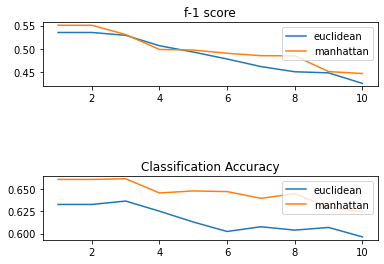

In [11]:
import matplotlib.pyplot as plt
k_plot = np.arange(1, 11)
plt.subplot(3, 1, 1)
plt.plot(k_plot, f1_euc, label = "euclidean")
plt.plot(k_plot, f1_manh, label = "manhattan")
plt.legend(loc = "upper right")
plt.title('f-1 score')
plt.subplot(3, 1, 3)
plt.plot(k_plot, accuracy_euc, label = "euclidean")
plt.plot(k_plot, accuracy_manh, label = "manhattan")
plt.legend(loc = "upper right")
plt.title('Classification Accuracy')

In [12]:
print('Using f-1 score to pick the best value for k')
print("The Best value of k = 1")

Using f-1 score to pick the best value for k
The Best value of k = 1


In [33]:
#Now running algorithm on entire test data for the best value of k(k = 1)
vocabulary = make_vocabulary(td)
vocabulary = np.array(list(vocabulary))
bow_ted = make_bow(ted, vocabulary)
bow_td = make_bow(td, vocabulary)
labels_euclidean = np.zeros((len(bow_ted), 2))
labels_manhatten = np.zeros((len(bow_ted), 2))
for i in range(len(bow_ted)):
    temp_labels_euc = np.zeros((2))
    temp_labels_manh = np.zeros((2))
    k = 1
    temp_labels_euc[1] = KNN(bow_ted[i], bow_td, "euclidean", label_td, k)
    temp_labels_manh[1] = KNN(bow_ted[i], bow_td, "manhatten", label_td, k)
    temp_labels_euc[0] = k
    temp_labels_manh[0] = k
    labels_euclidean[i] = temp_labels_euc
    labels_manhatten[i] = temp_labels_manh
confusion_matrix_euc = get_confusion_matrix(labels_euclidean[:, -1], label_ted)
confusion_matrix_manh = get_confusion_matrix(labels_manhatten[:, -1], label_ted)
scores1 = evaluation(confusion_matrix_euc)
scores2 = evaluation(confusion_matrix_manh)

print("Confusion Matrix euclidean: \n", confusion_matrix_euc)
print('\n')
print("f-1 score euclidean: \n", scores1[0])
print('\n')
print("accuracy euclidean: \n", scores1[1])
print('\n\n')

print("Confusion Matrix manhattan: \n", confusion_matrix_manh)
print('\n')
print("f-1 score manhattan: \n", scores2[0])
print('\n')
print("accuracy manhattan: \n", scores2[1])

Confusion Matrix euclidean: 
 [[ 16.  12.   4.]
 [ 14. 129.  38.]
 [  8.  22.  81.]]


f-1 score euclidean: 
 0.6331501831501831


accuracy euclidean: 
 0.6975308641975309



Confusion Matrix manhattan: 
 [[ 15.  17.   3.]
 [ 14. 121.  36.]
 [  9.  25.  84.]]


f-1 score manhattan: 
 0.6108684126659432


accuracy manhattan: 
 0.6790123456790124


In [34]:
#Part 2 using sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

vocabulary = make_vocabulary(td)
vocabulary = np.array(list(vocabulary))
bow_td = make_bow(td, vocabulary)
euclidean_scores = np.zeros((10, 2))
manhattan_scores =  np.zeros((10, 2))
for i in range(10):
    print('k = ', i + 1, '\n')
    knn1 = KNeighborsClassifier(n_neighbors=i + 1, metric="euclidean")
    knn2 = KNeighborsClassifier(n_neighbors=i + 1, metric="manhattan")
    y_pred_euclidean = cross_val_predict(knn1, bow_td, label_td[:, 0], cv = 5)
    y_pred_manhattan = cross_val_predict(knn2, bow_td, label_td[:, 0], cv = 5)
    euclidean_scores[i][0] = f1_score(label_td[:, 0], y_pred_euclidean, average = 'macro')
    manhattan_scores[i][0] = f1_score(label_td[:, 0], y_pred_manhattan, average = 'macro')
    euclidean_scores[i][1] = accuracy_score(label_td[:, 0], y_pred_euclidean)
    manhattan_scores[i][1] = accuracy_score(label_td[:, 0], y_pred_manhattan)
    report_euclidean = classification_report(label_td[:, 0], y_pred_euclidean)
    report_manhattan = classification_report(label_td[:, 0], y_pred_manhattan)
    confum_euc = confusion_matrix(label_td[:, 0], y_pred_euclidean)
    confum_manh = confusion_matrix(label_td[:, 0], y_pred_manhattan)
    print("Confusion Matrix euclidean: \n", confum_euc)
    print('\n')
    print("f-1 score euclidean: \n", euclidean_scores[i][0])
    print('\n')
    print("Accuracy score euclidean: \n", euclidean_scores[i][1])
    print('\n')
    print("Classification Report euclidean: \n", report_euclidean)
    print("\n\n")

    print("Confusion Matrix manhattan: \n", confum_manh)
    print('\n')
    print("f-1 score manhattan: \n", manhattan_scores[i][0])
    print('\n')
    print("Accuracy score manhattan: \n", manhattan_scores[i][1])
    print('\n')
    print("Classification Report manhattan: \n", report_manhattan)
    print('\n')

k =  1 

Confusion Matrix euclidean: 
 [[388 132  43]
 [189 406  39]
 [ 39  38  28]]


f-1 score euclidean: 
 0.5299081329680234


Accuracy score euclidean: 
 0.631336405529954


Classification Report euclidean: 
               precision    recall  f1-score   support

          -1       0.63      0.69      0.66       563
           0       0.70      0.64      0.67       634
           1       0.25      0.27      0.26       105

    accuracy                           0.63      1302
   macro avg       0.53      0.53      0.53      1302
weighted avg       0.64      0.63      0.63      1302




Confusion Matrix manhattan: 
 [[386 135  42]
 [193 399  42]
 [ 39  37  29]]


f-1 score manhattan: 
 0.5273263429976579


Accuracy score manhattan: 
 0.6251920122887865


Classification Report manhattan: 
               precision    recall  f1-score   support

          -1       0.62      0.69      0.65       563
           0       0.70      0.63      0.66       634
           1       0.26      0.28

Text(0.5, 1.0, 'Classification Accuracy')

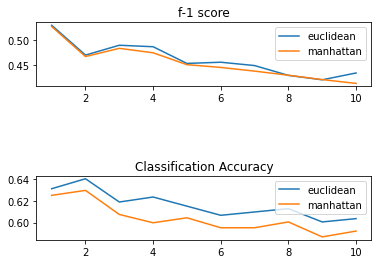

In [35]:

f1_scores_euc = euclidean_scores[:, 0]
f1_scores_manh = manhattan_scores[:, 0]
accuracy_scores_euc = euclidean_scores[:, 1]
accuracy_scores_manh = manhattan_scores[:, 1]
k_plot = np.arange(1, 11)
plt.subplot(3, 1, 1)
plt.plot(k_plot, f1_scores_euc, label = "euclidean")
plt.plot(k_plot, f1_scores_manh, label = "manhattan")
plt.legend(loc = "upper right")
plt.title('f-1 score')
plt.subplot(3, 1, 3)
plt.plot(k_plot, accuracy_scores_euc, label = "euclidean")
plt.plot(k_plot, accuracy_scores_manh, label = "manhattan")
plt.legend(loc = "upper right")
plt.title('Classification Accuracy')

In [44]:
print('Using f-1 score to pick the best value for k')
print('Best value of k = 1')

Using f-1 score to pick the best value for k
Best value of k = 1


In [37]:
#Now using sklearn for prediction of entire test data using k = 1
vocabulary = make_vocabulary(td)
vocabulary = np.array(list(vocabulary))
bow_td = make_bow(td, vocabulary)
bow_ted = make_bow(ted, vocabulary)
neigh1 = KNeighborsClassifier(n_neighbors=1, p = 2)
neigh2 = KNeighborsClassifier(n_neighbors=1, p = 1)
neigh1.fit(bow_td, label_td[:, 0])
neigh2.fit(bow_td, label_td[:, 0])
sk_labels_euc = neigh1.predict(bow_ted)
sk_labels_manh = neigh2.predict(bow_ted)
f1_score_euc = f1_score(label_ted[:, 0], sk_labels_euc, average = 'macro')
f1_score_manh = f1_score(label_ted[:, 0], sk_labels_manh, average = 'macro')
accuracy_score_euc = accuracy_score(label_ted[:, 0], sk_labels_euc)
accuracy_score_manh = accuracy_score(label_ted[:, 0], sk_labels_manh)
confm_euc = confusion_matrix(label_ted[:, 0], sk_labels_euc)
confm_manh = confusion_matrix(label_ted[:, 0], sk_labels_manh)

In [38]:
print("Confusion Matrix euclidean: \n", confm_euc)
print("f-1 score euclidean: \n", f1_score_euc)
print("Accuracy score euclidean: \n", accuracy_score_euc)
print("\n")

print("Confusion Matrix manhattan: \n", confm_manh)
print("f-1 score manhattan: \n", f1_score_manh)
print("Accuracy score manhattan: \n", accuracy_score_manh)

Confusion Matrix euclidean: 
 [[ 90  31   2]
 [ 51 108   4]
 [ 12  13  13]]
f-1 score euclidean: 
 0.5980095165449857
Accuracy score euclidean: 
 0.6512345679012346


Confusion Matrix manhattan: 
 [[ 89  33   1]
 [ 52 107   4]
 [ 12  13  13]]
f-1 score manhattan: 
 0.5954761467970052
Accuracy score manhattan: 
 0.6450617283950617
